In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)

### Data import

In [2]:
df = pd.read_csv("ETH_fraud_transaction_dataset.csv", index_col='Index')

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 1 to 2179
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [10]:
df.FLAG.value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [11]:
np.mean(df.FLAG)

0.22142058733868508

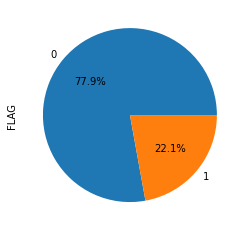

In [12]:
piedata = df.FLAG.value_counts()
piedata.plot.pie(autopct="%.1f%%");

Target variable (fraudulent wallet) consist about 22% of the dataset; baseline probability 22%

### Pairplot for visual inspection

In [13]:
df1 = df.iloc[:,1:14]

In [14]:
columns_to_drop = range(2,14)
df2 = df.drop(df.columns[columns_to_drop], axis=1).iloc[:,1:12]

In [15]:
columns_to_drop = range(2,26)
df3 = df.drop(df.columns[columns_to_drop], axis=1).iloc[:,1:12]

In [16]:
columns_to_drop = range(2,38)
df4 = df.drop(df.columns[columns_to_drop], axis=1).iloc[:,1:]

In [17]:
sample = df1.sample(500).reset_index()
sample2 = df2.sample(500).reset_index()
sample3 = df3.sample(500).reset_index()
sample4 = df4.sample(500).reset_index()

In [18]:
# sns.pairplot(sample, hue="FLAG", plot_kws={'alpha':0.5})

In [19]:
# sns.pairplot(sample2, hue="FLAG", plot_kws={'alpha':0.5})

In [20]:
# sns.pairplot(sample3, hue="FLAG", plot_kws={'alpha':0.5})

In [21]:
# sns.pairplot(sample4, hue="FLAG", plot_kws={'alpha':0.5})

Not very clear as is an imbalanced dataset

### Bar chart for visual inspection

In [22]:
sample.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.0000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1838.674000,0.256000,4059.609840,8131.810420,2.038947e+05,107.142000,183.4680,0.12800,34.560000,33.610000,38.366515,190.774940,70.030650,3.744479
std,1232.273866,0.436859,22838.162508,23258.348695,3.136608e+05,682.406553,989.5037,0.36863,354.911277,340.777976,209.095522,1107.960502,318.686734,19.524971
min,6.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,838.750000,0.000000,0.000000,0.000000,1.855500e+02,1.000000,1.0000,0.00000,1.000000,1.000000,0.001516,1.000000,0.308371,0.000000
50%,1613.000000,0.000000,15.265000,240.920000,2.642535e+04,2.000000,4.0000,0.00000,2.000000,2.000000,0.099997,5.184160,1.534058,0.083910
75%,2573.000000,1.000000,260.177500,4903.860000,2.797400e+05,9.000000,20.2500,0.00000,5.000000,3.000000,6.957200,73.872505,42.950018,1.000000
max,4699.000000,1.000000,377913.420000,224097.920000,1.355184e+06,9054.000000,9999.0000,4.00000,7409.000000,5058.000000,4078.142838,19999.990000,5000.500000,365.734892


In [23]:
# rows = 4
# columns = 3
# grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)

def distribution_visual(sample):
    for i in sample.columns[2:]:

        emptydf = pd.DataFrame()
        emptydf["flag"] = sample["FLAG"]
        emptydf["feat"] = sample[i]
        emptydf["interval"] = pd.cut(emptydf["feat"], bins=20, precision=0)

        var = emptydf.groupby("interval").flag.mean()

        chartdf = pd.DataFrame()
        chartdf["means"] = var
        chartdf["intervals"] = var.index

    #     exec (f"plt.subplot(grid{[i]})")
        sns.barplot(x="intervals", y="means", data=chartdf)
        plt.xticks(rotation=270)
        plt.title(i)
        plt.show()

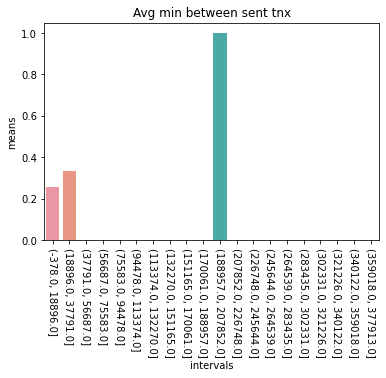

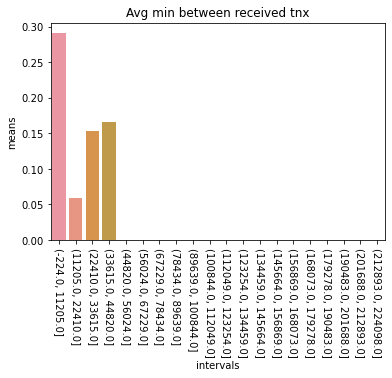

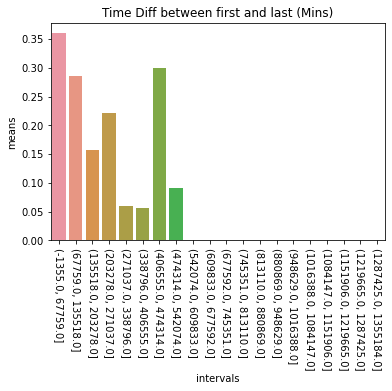

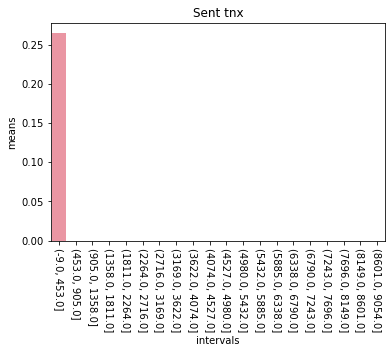

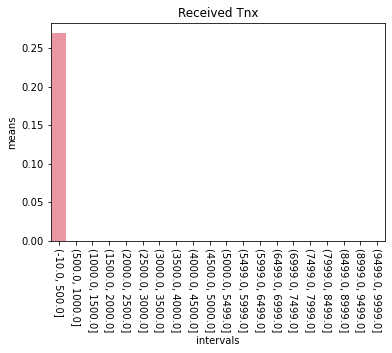

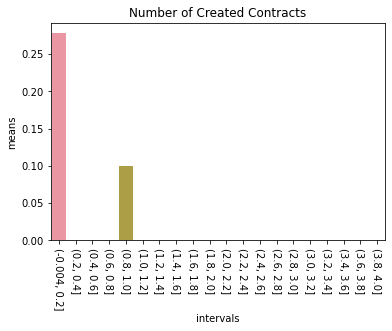

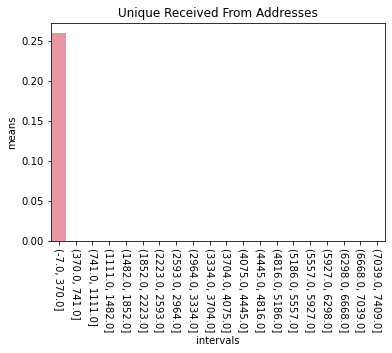

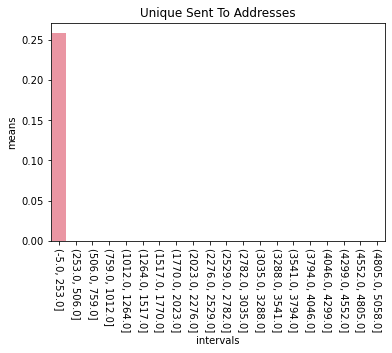

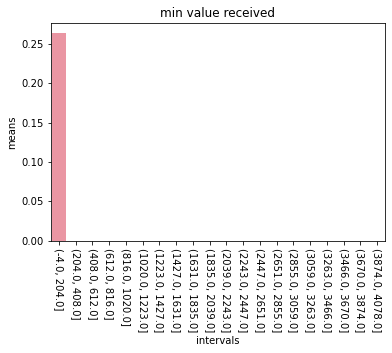

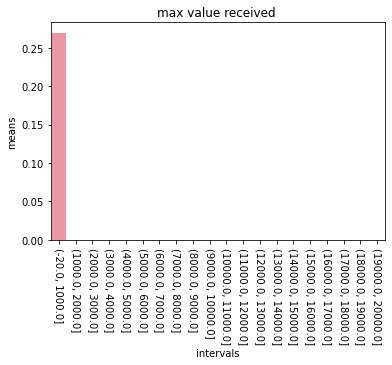

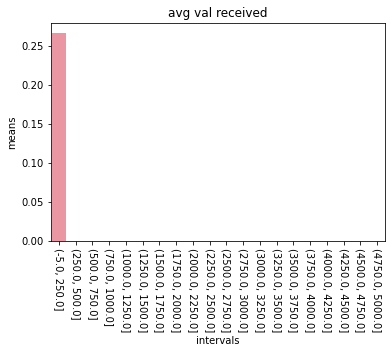

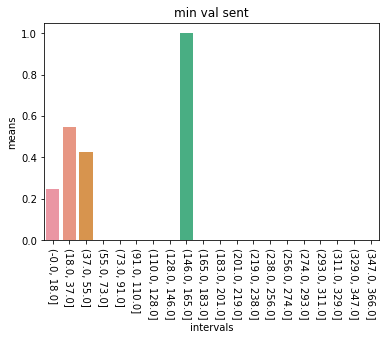

In [24]:
distribution_visual(sample)

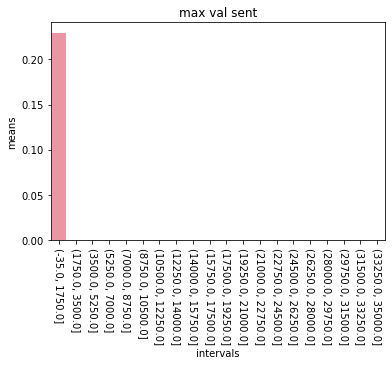

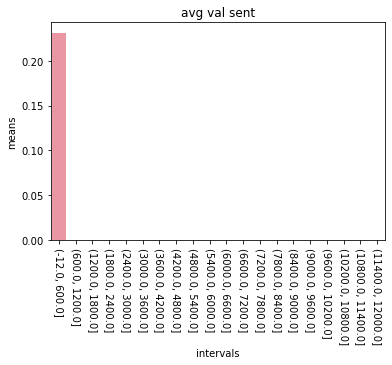

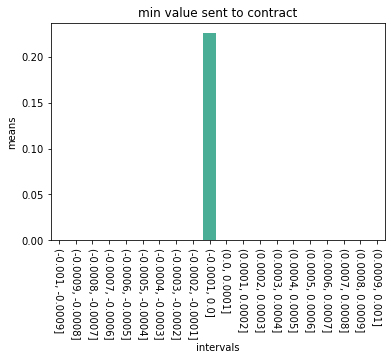

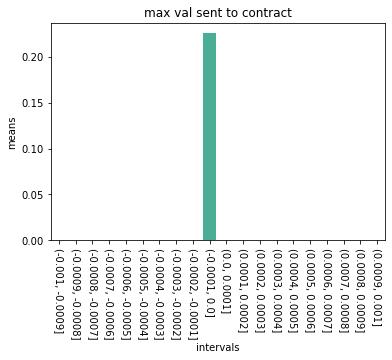

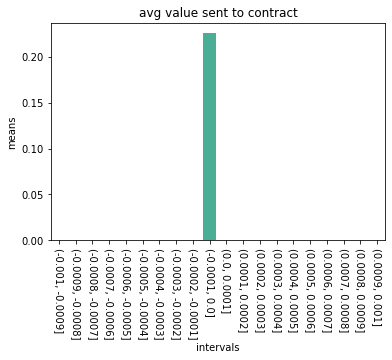

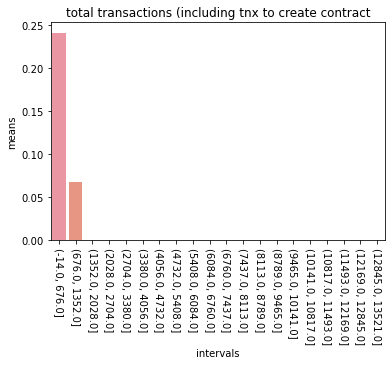

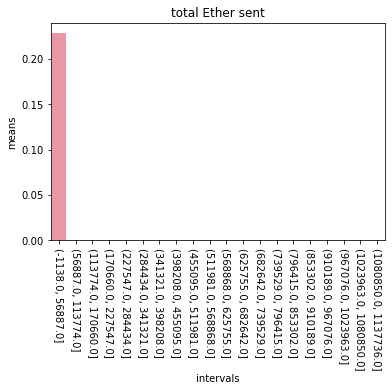

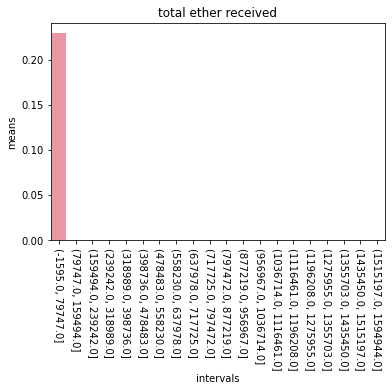

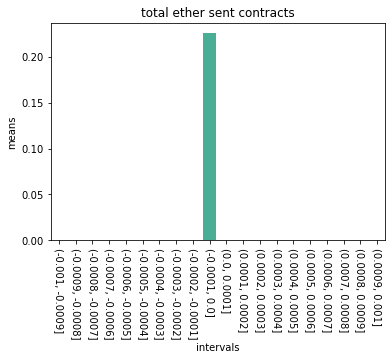

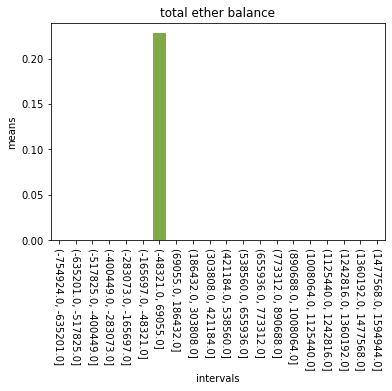

In [25]:
distribution_visual(sample2)

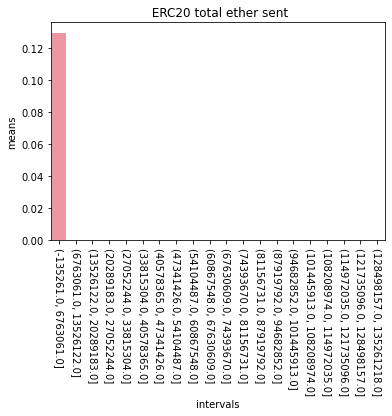

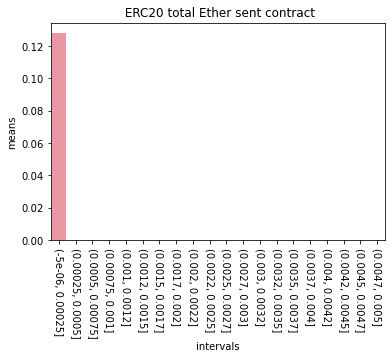

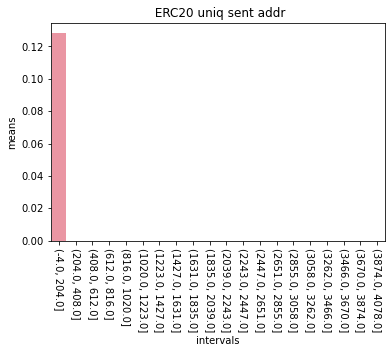

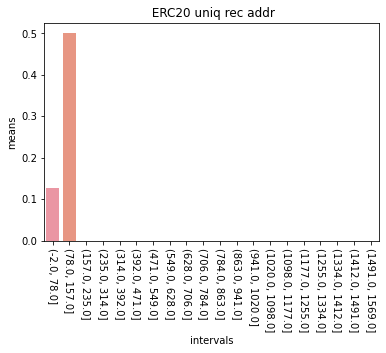

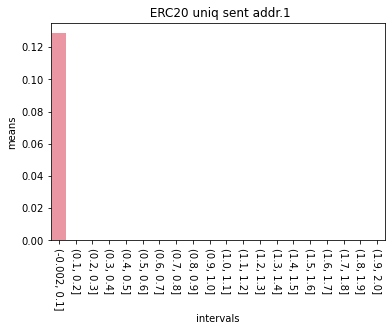

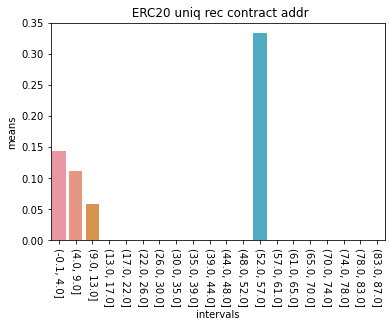

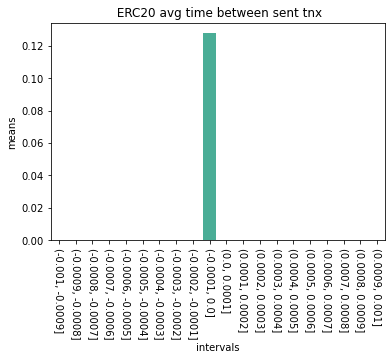

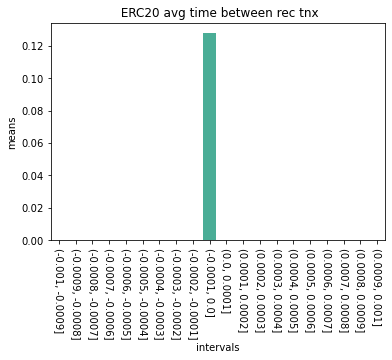

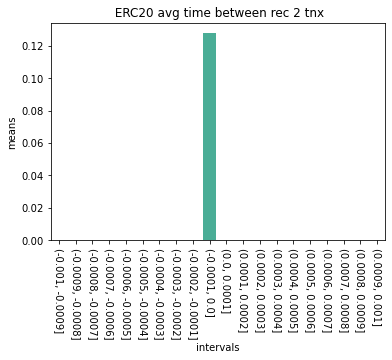

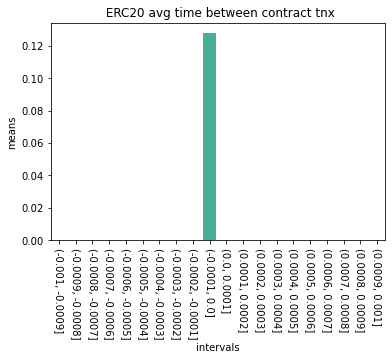

In [26]:
distribution_visual(sample3)

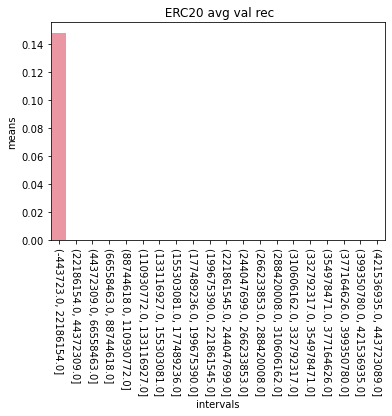

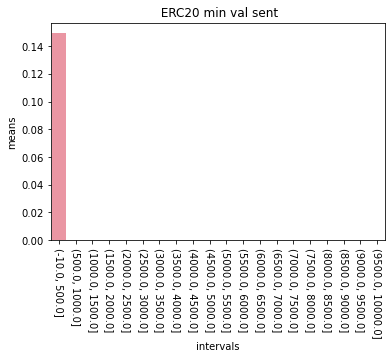

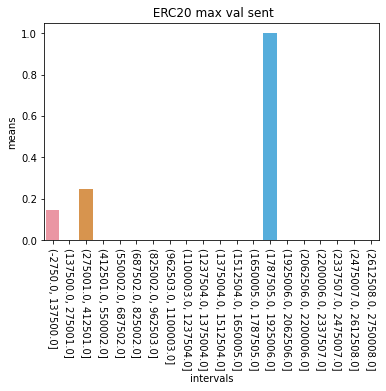

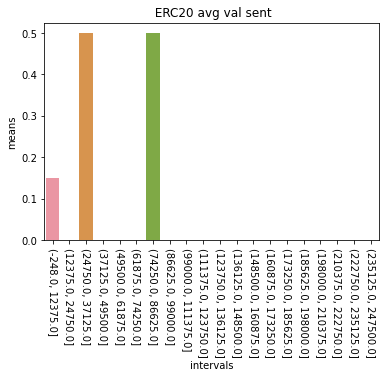

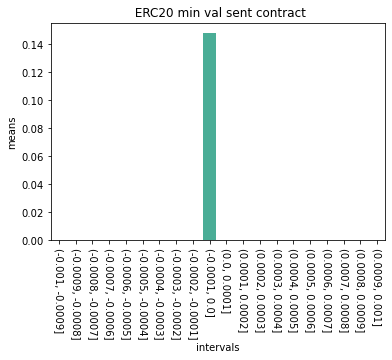

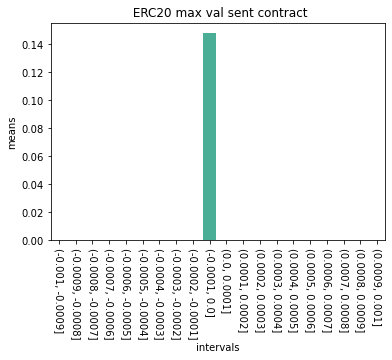

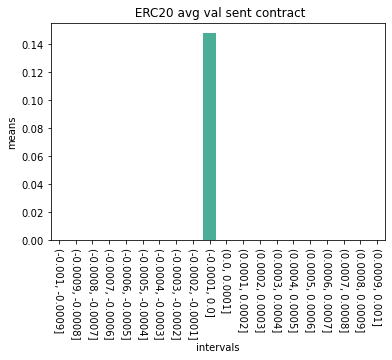

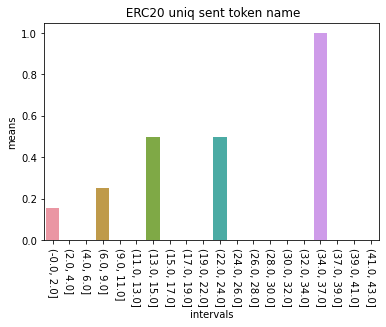

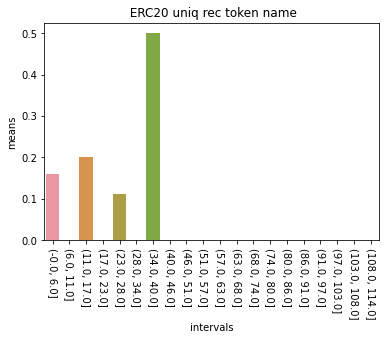

TypeError: '<=' not supported between instances of 'str' and 'float'

In [27]:
distribution_visual(sample4)

In [1]:
sns.boxplot(x = 'FLAG', y='Time Diff between first and last (Mins)', data=df)

NameError: name 'sns' is not defined

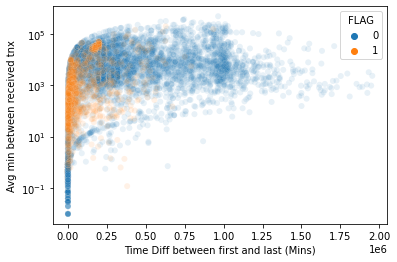

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Avg min between received tnx"], \
                hue=df["FLAG"], alpha=0.1)
ax.set_yscale('log')

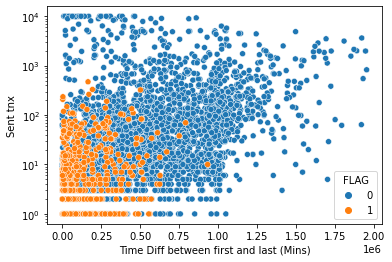

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Sent tnx"], \
                hue=df["FLAG"])
ax.set_yscale('log')

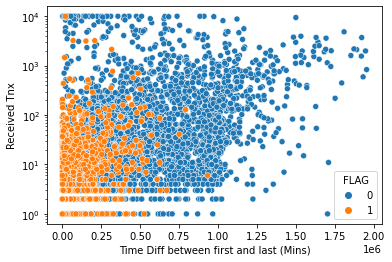

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Received Tnx"], \
                hue=df["FLAG"])

ax.set_yscale('log')

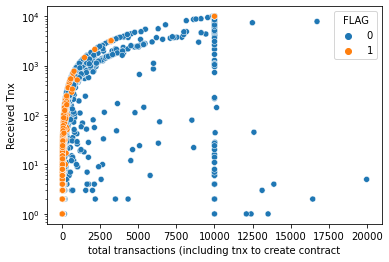

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["total transactions (including tnx to create contract"], y=df["Received Tnx"], \
                hue=df["FLAG"])

ax.set_yscale('log')

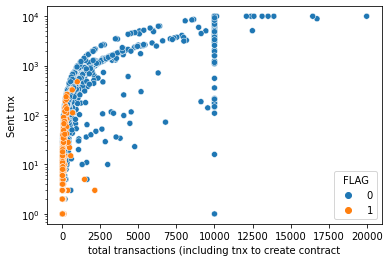

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["total transactions (including tnx to create contract"], y=df["Sent tnx"], \
                hue=df["FLAG"])

ax.set_yscale('log')

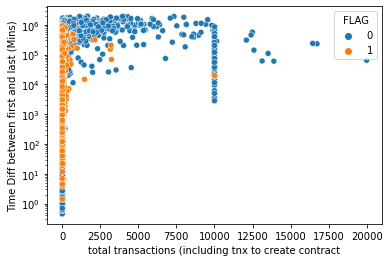

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["total transactions (including tnx to create contract"], y=df["Time Diff between first and last (Mins)"], \
                hue=df["FLAG"])

ax.set_yscale('log')

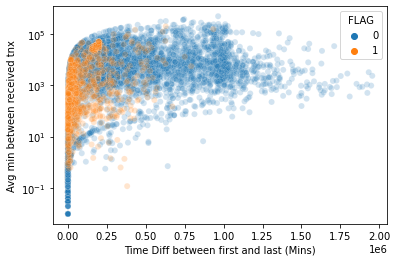

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Avg min between received tnx"], \
                hue=df["FLAG"], alpha=0.2)

ax.set_yscale('log')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


9841

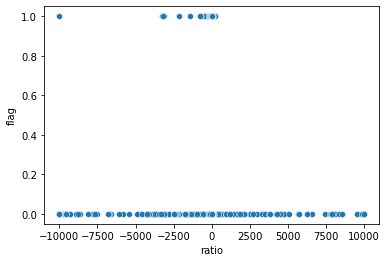

In [80]:
tnxratio = pd.DataFrame(df["Sent tnx"]-df["Received Tnx"])
tnxratio["FLAG"] = df["FLAG"]
tnxratio.columns = ["ratio", "flag"]
tnxratio.fillna(0, axis=1, inplace=True)
tnxratio.replace([np.inf, -np.inf], 0, inplace=True)
# sns.distplot(tnxratio, bins=1000, kde=False)
sns.scatterplot(tnxratio["ratio"], tnxratio["flag"])
# tnxratio.sort_values("ratio",ascending=False).head(50)
len(tnxratio.ratio)

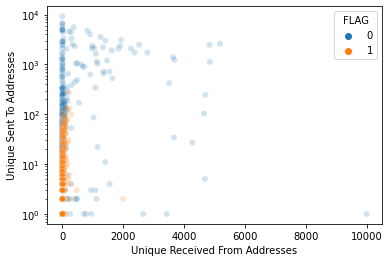

In [81]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Unique Received From Addresses"], y=df["Unique Sent To Addresses"], \
                hue=df["FLAG"], alpha=0.2)

ax.set_yscale('log')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Avg min between received tnx"], \
                hue=df["FLAG"], alpha=0.2)

ax.set_yscale('log')

### DF for the baseline KNN

In [ ]:
dffinal = df.drop(df[['min value sent to contract', 'max val sent to contract', 'avg value sent to contract', \
                      'total ether sent contracts', ' ERC20 min val sent contract', ' ERC20 max val sent contract', \
                      ' ERC20 avg val sent contract',' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',\
                      ' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx']], axis=1)

In [ ]:
# dffinal[['col1','col2']] = df[[' ERC20 most sent token type', ' ERC20_most_rec_token_type']].astype('category')

In [ ]:
# dffinal.drop([' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis=1, inplace=True)

In [ ]:
# mask = dffinal.select_dtypes(['category']).columns
# dffinal[mask] = dffinal[mask].apply(lambda x: x.cat.codes)

In [ ]:
# dffinal[dffinal['col2']==-1]

In [ ]:
dffinal.to_csv("features_selected_raw.csv")

In [ ]:
dffinal.info()

In [ ]:
check = dffinal[['min value received', 'max value received ','avg val received', 'min val sent', \
                 'max val sent', 'avg val sent',' ERC20 min val rec', ' ERC20 max val rec', \
                 ' ERC20 avg val rec',' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent']].reset_index()

In [ ]:
checkpp = check.iloc[:,2:].dropna(axis=0).sample(1000)

In [ ]:
dffinaldropped = df.drop(['min value sent to contract', 'max val sent to contract', 'avg value sent to contract', \
                      'total ether sent contracts', ' ERC20 min val sent contract', ' ERC20 max val sent contract', \
                      ' ERC20 avg val sent contract',' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',\
                      ' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx'], axis=1)

In [ ]:
dffinaldropped.dropna(axis='columns', inplace=True)

In [ ]:
dffinaldropped.info()

In [ ]:
dffinaldropped.to_csv("features_selected_columnsdropped.csv")

In [ ]:
# dffinaldropped.dropna(axis='rows', inplace=True)

### Random Forest to get feature importance

In [ ]:
# convert last 2 categories into missing or not first, and then use it 

In [ ]:
dffinal.dropna(axis='rows',inplace=True)
dffinal_features = dffinal.iloc[:,2:36].astype(np.int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

target = dffinal["FLAG"].to_numpy()

# feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(dffinal_features,target.reshape(-1, 1))

In [ ]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=dffinal_features.columns)

In [ ]:
unsorted_list = [(importance, feature) for feature, importance in 
                  zip(dffinal_features.columns, importances)]
sorted_list = sorted(unsorted_list)

features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(features_sorted,importance_sorted, yerr=std)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
ax.yaxis.set_label_position("right")
fig.tight_layout()

In [7]:
(df.Address.value_counts() > 1).sum()

25

In [4]:
dff

NameError: name 'dff' is not defined